## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>Saturn</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>wagon</li>
    </ul>
</li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [4]:
library("caret")
data(cars)
str(cars)

'data.frame':	804 obs. of  18 variables:
 $ Price      : num  22661 21725 29143 30732 33359 ...
 $ Mileage    : int  20105 13457 31655 22479 17590 23635 17381 27558 25049 17319 ...
 $ Cylinder   : int  6 6 4 4 4 4 4 4 4 4 ...
 $ Doors      : int  4 2 2 2 2 2 2 2 2 4 ...
 $ Cruise     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Sound      : int  0 1 1 0 1 0 1 0 0 0 ...
 $ Leather    : int  0 0 1 0 1 0 1 1 0 1 ...
 $ Buick      : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Cadillac   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Chevy      : int  0 1 0 0 0 0 0 0 0 0 ...
 $ Pontiac    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Saab       : int  0 0 1 1 1 1 1 1 1 1 ...
 $ Saturn     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ convertible: int  0 0 1 1 1 1 1 1 1 0 ...
 $ coupe      : int  0 1 0 0 0 0 0 0 0 0 ...
 $ hatchback  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sedan      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ wagon      : int  0 0 0 0 0 0 0 0 0 0 ...


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

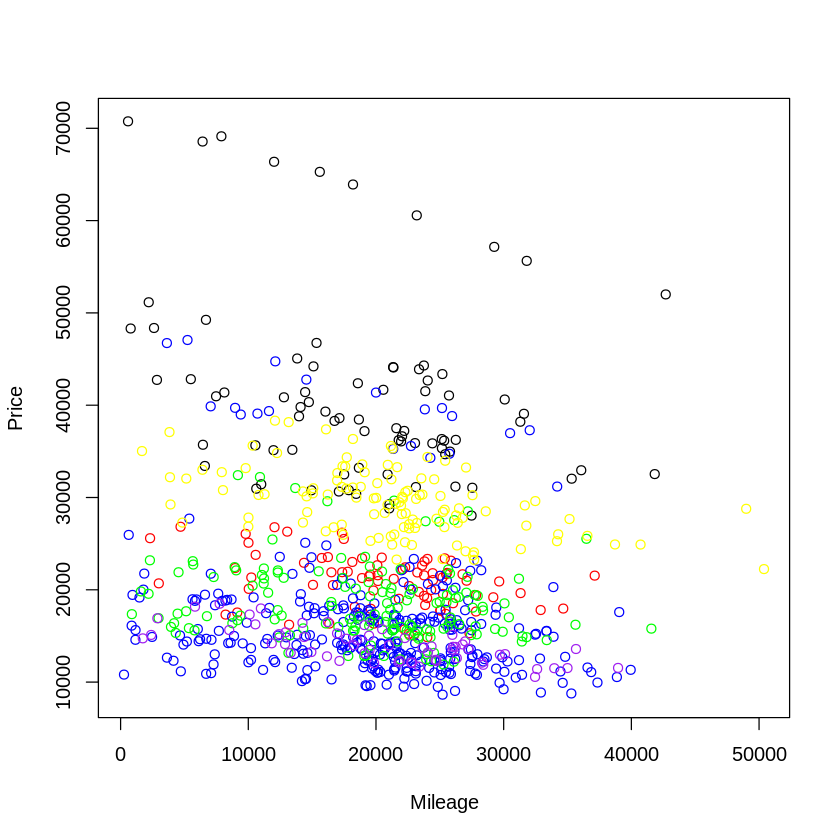

In [6]:
# Put the command (or commands) here that would give answer to the above question.
buick <- cars[cars$Buick == 1, ]
cadillac <- cars[cars$Cadillac == 1, ]
chevy <- cars[cars$Chevy == 1, ]
pontiac <- cars[cars$Pontiac == 1, ]
saab <- cars[cars$Saab == 1, ]
saturn <- cars[cars$Saturn == 1, ]

xlim <- c(min(cars$Mileage), max(cars$Mileage))
ylim <- c(min(cars$Price), max(cars$Price))

plot(Price~Mileage, data=cadillac, xlim=xlim, ylim=ylim)
points(Price~Mileage, data=buick, col="red")
points(Price~Mileage, data=chevy, col="blue")
points(Price~Mileage, data=pontiac, col="green")
points(Price~Mileage, data=saab, col="yellow")
points(Price~Mileage, data=saturn, col="purple")

# the answer for question is not obvious from the current plot 
# (still I find it better to separate makes by colors)
# I think some trend is visible though

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 


Call:
lm(formula = Price ~ Mileage, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-13905  -7254  -3520   5188  46091 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.476e+04  9.044e+02  27.383  < 2e-16 ***
Mileage     -1.725e-01  4.215e-02  -4.093 4.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9789 on 802 degrees of freedom
Multiple R-squared:  0.02046,	Adjusted R-squared:  0.01924 
F-statistic: 16.75 on 1 and 802 DF,  p-value: 4.685e-05


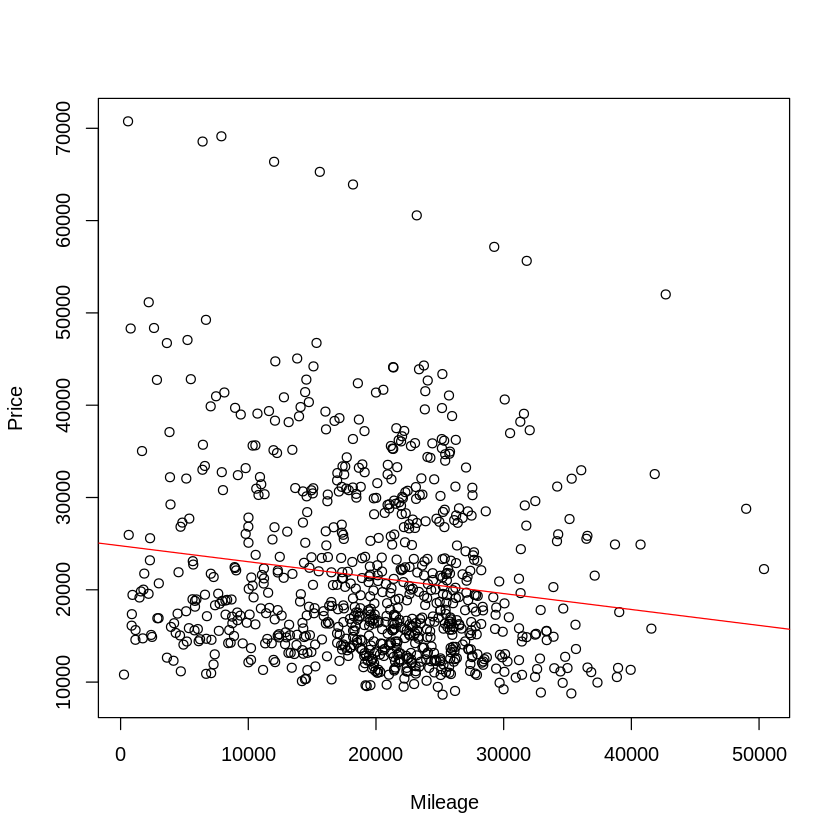

In [12]:
# Linear regression model:
linReg <- lm(Price~Mileage, data=cars)
plot(Price~Mileage, data=cars)
abline(coef(linReg), col="red")
# Show summary statistics for the model:
summary(linReg)

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [13]:
# Command:
linReg$coefficients["Mileage"]
# One sentence summary:
# since the model has linear relation between price and mileage, 
# what happens to price with an extra mile determined by coeff $\beta_1$,
# which can be extracted from model

Mileage 
-0.1725205

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [14]:
# Single command
linReg$coefficients["(Intercept)"]

(Intercept) 
   24764.56

<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

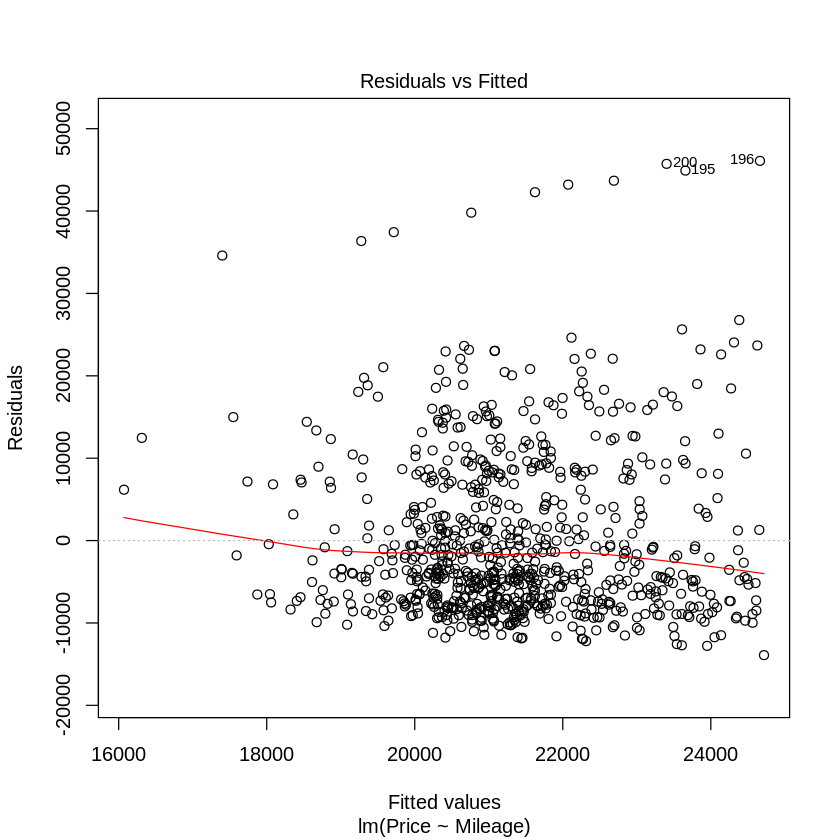

In [16]:
# Plot residuals
plot(linReg, which=1)
# Explain whether there are any problems (1-2 sentence)
# The model does not fit data well. 
# Secondly, there's some number of outliers. 
# Also data has heteroscedasticity.
# The line is curved so may be non-linear dependency would be better fit.

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [18]:
# Commands:
model.all <- lm(Price~Mileage+Cylinder+Doors+Cruise+Sound+Leather, data=cars)
summary(model.all)
# Explanation:
# This model is obviously more accurate based on RSE and R^2. 
# Still R^2 is low enough which means we're only able to explain about 
# half of observation with constructed model


Call:
lm(formula = Price ~ Mileage + Cylinder + Doors + Cruise + Sound + 
    Leather, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-13104  -5566  -1544   3877  33349 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.323e+03  1.771e+03   4.135 3.92e-05 ***
Mileage     -1.705e-01  3.186e-02  -5.352 1.14e-07 ***
Cylinder     3.200e+03  2.030e+02  15.765  < 2e-16 ***
Doors       -1.463e+03  3.083e+02  -4.747 2.45e-06 ***
Cruise       6.206e+03  6.515e+02   9.525  < 2e-16 ***
Sound       -2.024e+03  5.707e+02  -3.547 0.000412 ***
Leather      3.327e+03  5.971e+02   5.572 3.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7387 on 797 degrees of freedom
Multiple R-squared:  0.4457,	Adjusted R-squared:  0.4415 
F-statistic: 106.8 on 6 and 797 DF,  p-value: < 2.2e-16


<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [21]:
# Command(s):
cor(cars[c('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')])

install.packages('usdm')
library(usdm)
vif(cars[c('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')])
# Comment on the result
# correlation matrix shows some colinearity between Cylinder and Cruise,
# and between Leather and Sound. But it seems calculated values do not
# represent highly colinear data.
# calculation of vif for all of variables is close to 1 - which is the 
# smallest amount possible. It means there's no considerable collinearity
# in data

,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Mileage,1.000000000,-0.02946099,-0.01694449,0.02503665,-0.02614593,0.001005446
Cylinder,-0.029460989,1.00000000,0.00220592,0.35428485,-0.08970430,0.075519616
Doors,-0.016944490,0.00220592,1.00000000,-0.04767418,-0.06253031,-0.061968579
Cruise,0.025036652,0.35428485,-0.04767418,1.00000000,-0.09173015,-0.070573094
Sound,-0.026145926,-0.08970430,-0.06253031,-0.09173015,1.00000000,0.165443625
Leather,0.001005446,0.07551962,-0.06196858,-0.07057309,0.16544362,1.000000000


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Variables,VIF
Mileage,1.003421
Cylinder,1.167272
Doors,1.010767
Cruise,1.164616
Sound,1.045804
Leather,1.049990


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [29]:
chevy = c("Mileage"=30000,
          "Cylinder"=4,
          "Doors"=2, 
          "Cruise"=1,
          "Sound"=1,
          "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors
predict(model.all, data.frame(t(chevy)))

1 
19589.61

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [25]:
# Commands
model.allReal <- lm(Price~., data=cars)
summary(model.allReal)
vif(cars)

# Comments on problems
# First problem I encoutered is linear dependency between features.
# corrrelation matrix was not super helpful to resolve it, but to prove this point 
# vif shows high collinearity of the data. Also, intercept coefficient is likely 0 
# due to this model.
# Thus, there's a need to remove some features out of consideration (I started with ones
# with high vif)



Call:
lm(formula = Price ~ ., data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9513.5 -1540.9   125.4  1470.3 13619.7 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.124e+03  9.926e+02  -1.133  0.25773    
Mileage     -1.842e-01  1.256e-02 -14.664  < 2e-16 ***
Cylinder     3.659e+03  1.133e+02  32.286  < 2e-16 ***
Doors        1.567e+03  2.589e+02   6.052  2.2e-09 ***
Cruise       3.409e+02  2.960e+02   1.152  0.24978    
Sound        4.409e+02  2.345e+02   1.880  0.06043 .  
Leather      7.908e+02  2.497e+02   3.167  0.00160 ** 
Buick        9.477e+02  5.525e+02   1.715  0.08670 .  
Cadillac     1.336e+04  6.248e+02  21.386  < 2e-16 ***
Chevy       -5.492e+02  4.397e+02  -1.249  0.21203    
Pontiac     -1.400e+03  4.868e+02  -2.875  0.00414 ** 
Saab         1.228e+04  5.546e+02  22.139  < 2e-16 ***
Saturn              NA         NA      NA       NA    
convertible  1.102e+04  5.419e+02  2

Variables,VIF
Price,11.774164
Mileage,1.282554
Cylinder,5.458315
Doors,Inf
Cruise,1.555622
Sound,1.145715
Leather,1.201845
Buick,Inf
Cadillac,Inf
Chevy,Inf



Call:
lm(formula = Price ~ Mileage + Cylinder + Doors + Cruise + Sound + 
    Leather + Buick + Cadillac + Chevy + Pontiac + Saab + convertible + 
    wagon, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9489.7 -1672.5   151.4  1593.9 13527.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3879.7457   855.6712   4.534 6.68e-06 ***
Mileage        -0.1833     0.0127 -14.432  < 2e-16 ***
Cylinder     3620.6244   114.2795  31.682  < 2e-16 ***
Doors        -807.1291   148.0586  -5.451 6.68e-08 ***
Cruise        580.3686   294.1386   1.973  0.04883 *  
Sound         460.7705   237.1047   1.943  0.05233 .  
Leather       744.4520   252.3549   2.950  0.00327 ** 
Buick         973.9534   558.7772   1.743  0.08172 .  
Cadillac    13459.5122   631.5164  21.313  < 2e-16 ***
Chevy        -897.5778   437.3278  -2.052  0.04046 *  
Pontiac     -1396.8790   492.3809  -2.837  0.00467 ** 
Saab        12178.1503   560.4284  21.730  < 2e-16 ***
conv

Variables,VIF
Mileage,1.007608
Cylinder,2.337074
Doors,1.472747
Cruise,1.499654
Sound,1.140174
Leather,1.184617
Buick,2.603662
Cadillac,3.325650
Chevy,4.264695
Pontiac,3.424128


In [30]:
#iteration2
model.allReal <- lm(Price~Mileage+
                    Cylinder+
                    Doors+
                    Cruise+
                    Sound+
                    Leather+
                    Buick+
                    Cadillac+
                    Chevy+
                    Pontiac+
                    Saab+
                    convertible+
                    wagon,
                    data=cars)
summary(model.allReal)
vif(cars[c('Mileage',
           'Cylinder',
           'Doors',
           'Cruise',
           'Sound',
           'Leather',
           'Buick',
           'Cadillac',
           'Chevy',
           'Pontiac',
           'Saab',
           'convertible',
           'wagon')])

#after iteration two model summary looks better still 
# there's a presence of data collinearity. I'll go 
# ahead to remove some features with high VIF.
# From one point of view seems reasonable to do it: 
# since we're interested in chevy
# prediction removing of saab should be safe. Still, 
# another makes may contribute to 
# overall result and may be significant.


Call:
lm(formula = Price ~ Mileage + Cylinder + Doors + Cruise + Sound + 
    Leather + Buick + Cadillac + Chevy + Pontiac + Saab + convertible + 
    wagon, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9489.7 -1672.5   151.4  1593.9 13527.2 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3879.7457   855.6712   4.534 6.68e-06 ***
Mileage        -0.1833     0.0127 -14.432  < 2e-16 ***
Cylinder     3620.6244   114.2795  31.682  < 2e-16 ***
Doors        -807.1291   148.0586  -5.451 6.68e-08 ***
Cruise        580.3686   294.1386   1.973  0.04883 *  
Sound         460.7705   237.1047   1.943  0.05233 .  
Leather       744.4520   252.3549   2.950  0.00327 ** 
Buick         973.9534   558.7772   1.743  0.08172 .  
Cadillac    13459.5122   631.5164  21.313  < 2e-16 ***
Chevy        -897.5778   437.3278  -2.052  0.04046 *  
Pontiac     -1396.8790   492.3809  -2.837  0.00467 ** 
Saab        12178.1503   560.4284  21.730  < 2e-16 ***
conv

Variables,VIF
Mileage,1.007608
Cylinder,2.337074
Doors,1.472747
Cruise,1.499654
Sound,1.140174
Leather,1.184617
Buick,2.603662
Cadillac,3.325650
Chevy,4.264695
Pontiac,3.424128


In [31]:
# third iteration
model.allReal <- lm(Price~Mileage+
                    Cylinder+
                    Doors+
                    Cruise+
                    Sound+
                    Leather+
                    Buick+
                    Cadillac+
                    Chevy+
                    convertible+
                    wagon,
                    data=cars)
summary(model.allReal)
vif(cars[c('Mileage',
           'Cylinder',
           'Doors',
           'Cruise',
           'Sound',
           'Leather',
           'Buick',
           'Cadillac',
           'Chevy',
           'convertible',
           'wagon')])

#Finally, I think I removed data collinearity. The model
# still may be not perfect but looks okay to me :)


Call:
lm(formula = Price ~ Mileage + Cylinder + Doors + Cruise + Sound + 
    Leather + Buick + Cadillac + Chevy + convertible + wagon, 
    data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9745.1 -2901.1  -600.7  1797.6 13803.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.059e+03  1.231e+03   6.546 1.06e-10 ***
Mileage     -1.715e-01  1.863e-02  -9.210  < 2e-16 ***
Cylinder     2.092e+03  1.456e+02  14.373  < 2e-16 ***
Doors       -1.094e+02  2.132e+02  -0.513    0.608    
Cruise       3.876e+03  3.958e+02   9.792  < 2e-16 ***
Sound        3.487e+02  3.452e+02   1.010    0.313    
Leather      1.725e+03  3.661e+02   4.713 2.88e-06 ***
Buick       -7.160e+02  5.904e+02  -1.213    0.226    
Cadillac     1.286e+04  6.747e+02  19.067  < 2e-16 ***
Chevy       -2.895e+03  3.849e+02  -7.523 1.46e-13 ***
convertible  1.747e+04  7.325e+02  23.853  < 2e-16 ***
wagon        6.338e+03  6.321e+02  10.027  < 2e-16 ***
---
Signif. codes:  0

Variables,VIF
Mileage,1.005777
Cylinder,1.760450
Doors,1.418036
Cruise,1.260889
Sound,1.122371
Leather,1.157723
Buick,1.349524
Cadillac,1.762395
Chevy,1.533588
convertible,1.352226


In [32]:
#And prediction. Looking for data, there's no wagon chevy's with 2 doors
# So the only variable left if convertible. There's prediction for 2 
# results:
chevy = c("Mileage"=30000,
          "Cylinder"=4,
          "Doors"=2,
          "Cruise"=1,
          "Sound"=1,
          "Leather"=1,
          "Buick"=0,
          "Cadillac"=0,
          "Chevy"=1,
          "convertible"=0,
          "wagon"=0)
predict(model.allReal, data.frame(t(chevy)))

# and for convertible chevy:
chevy = c("Mileage"=30000,
          "Cylinder"=4,
          "Doors"=2,
          "Cruise"=1,
          "Sound"=1,
          "Leather"=1,
          "Buick"=0,
          "Cadillac"=0,
          "Chevy"=1,
          "convertible"=1,
          "wagon"=0)
predict(model.allReal, data.frame(t(chevy)))

1 
14116.69

1 
31589